<a href="https://colab.research.google.com/github/AnSaradar/Diamond_Price_Prediction/blob/main/Final_Diamond_Price_Predection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries & Loading the Data



In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Datasets/train.csv')
test_set = pd.read_csv('/content/drive/MyDrive/Datasets/test.csv')

#Discovering the Data

In [ ]:
train_data.columns

Index(['Id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

In [ ]:
train_data.shape

(43152, 11)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


We Notice that there are only three categorical features that should be convert {Cut,Color,Clarity}

In [ ]:
train_data.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
train_data.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There are no missing values , but maybe there are some zero values So we will check it later

#Data Visualization

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'y'}>, <Axes: title={'center': 'z'}>,
        <Axes: >]], dtype=object)

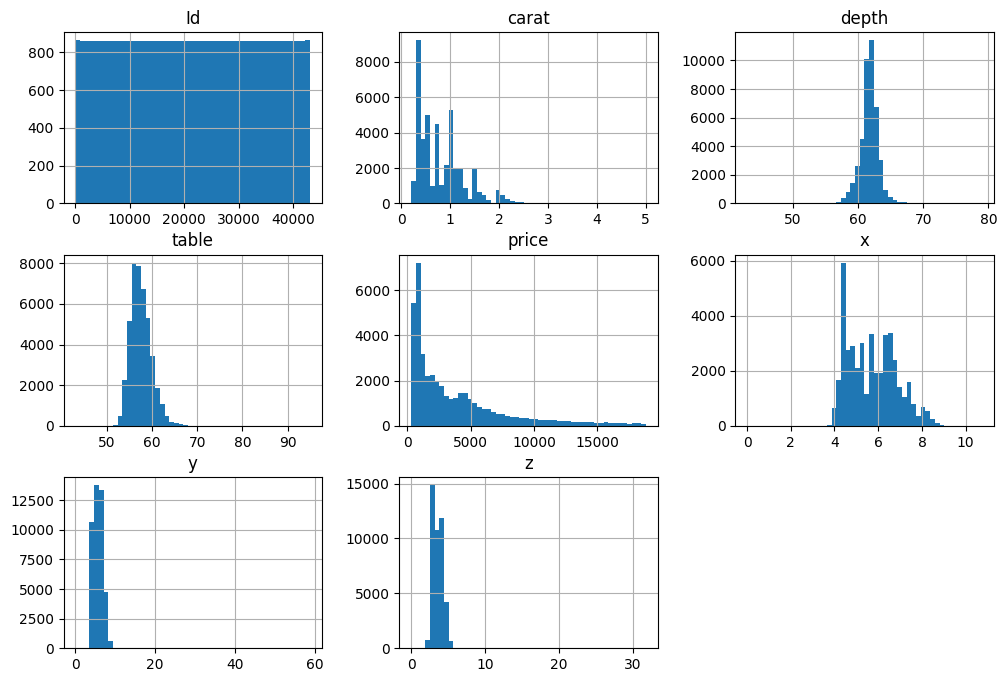

In [ ]:
train_data.hist(bins=50, figsize=(12, 8))

We Notice that both {Carat , Price} columns are highly skewed to the right So we have to fix that 

Now We will plot the box plots for numerical values to see the quantiles and the outliers

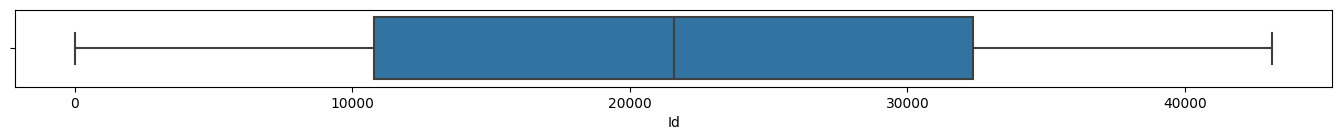

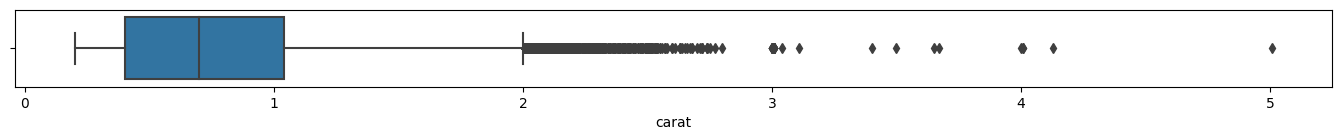

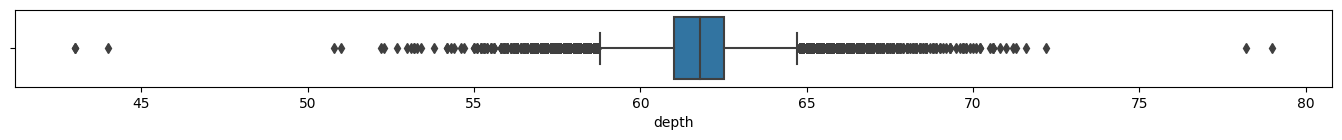

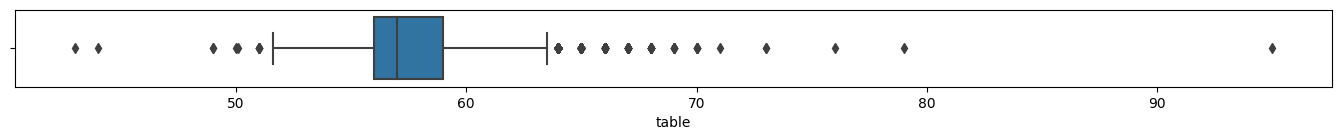

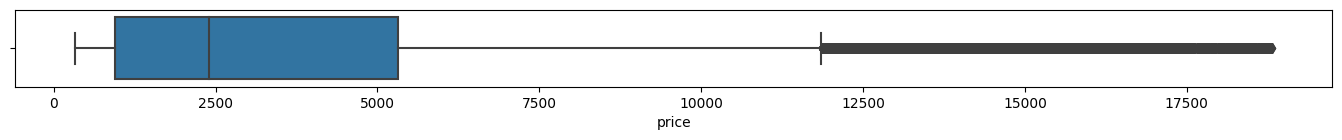

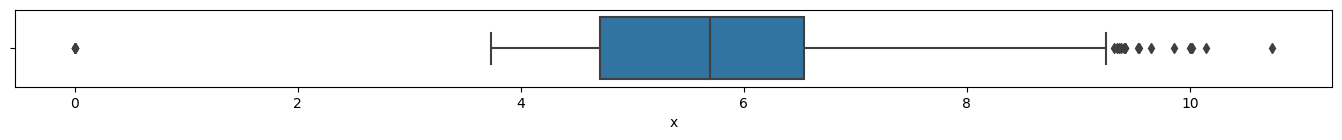

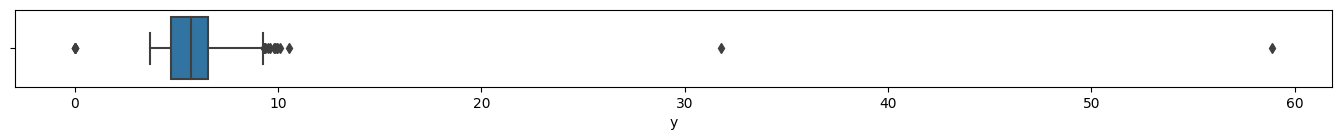

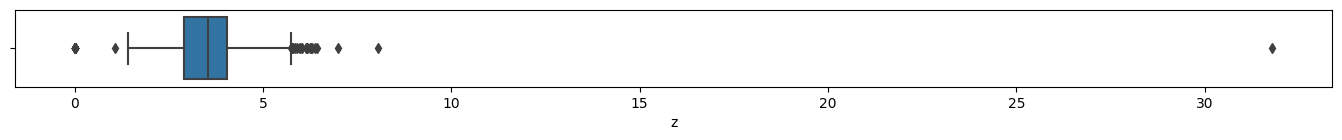

In [ ]:
num_columns = train_data.drop(['clarity','color','cut'],axis=1)
for column in num_columns:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=num_columns, x=column)

<Axes: xlabel='x', ylabel='price'>

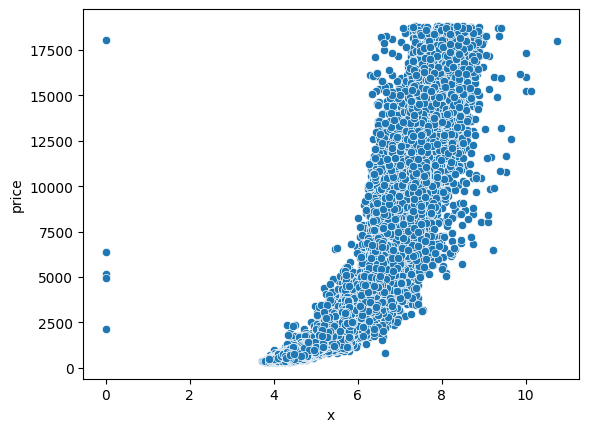

In [ ]:
sns.scatterplot(x=train_data['x'],y=train_data["price"])

<Axes: xlabel='y', ylabel='price'>

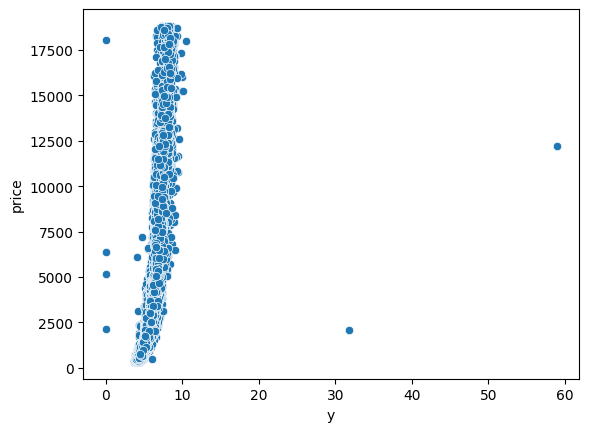

In [ ]:
sns.scatterplot(x=train_data['y'],y=train_data["price"])

<Axes: xlabel='z', ylabel='price'>

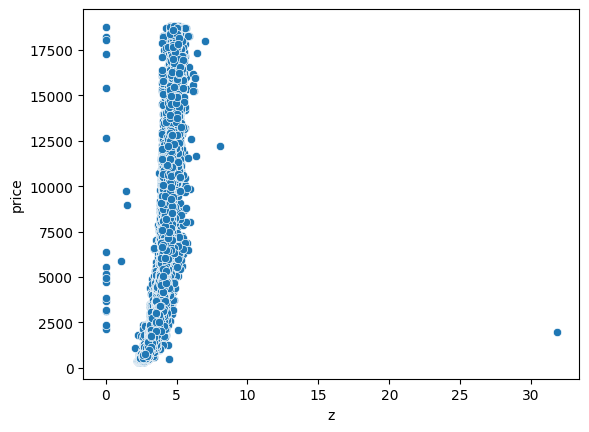

In [ ]:
sns.scatterplot(x=train_data['z'],y=train_data["price"])

from the Scatter & Box plot , We notice there are some outliers in each columns and we should get rid of them , Specially the the zero values of {x,y,z} because this means the diamond is not a 3D Object , and this doesnt make any sense

#Data Preprocessing

##Handling 1D & 2D Diamond

In [ ]:
train_data.drop(train_data[train_data['x']==0].index,inplace=True)
train_data.drop(train_data[train_data['y']==0].index,inplace=True)
train_data.drop(train_data[train_data['z']==0].index,inplace=True)

##Handling Outliers

In [ ]:
train_data.drop(train_data[train_data["x"]> 10].index, inplace=True)

In [ ]:
train_data.drop(train_data[train_data["y"]> 20].index, inplace=True)

In [ ]:
train_data.drop(train_data[train_data["z"]> 10].index, inplace=True)
train_data.drop(train_data[train_data["z"]< 2].index, inplace=True)

In [ ]:
train_data.drop(train_data[train_data["table"]> 70].index, inplace=True)
train_data.drop(train_data[train_data["table"]< 50].index, inplace=True)

In [ ]:
train_data.drop(train_data[train_data["depth"]> 72].index, inplace=True)
train_data.drop(train_data[train_data["depth"]< 53].index, inplace=True)

In [ ]:
train_data.drop(train_data[train_data["depth"]> 72].index, inplace=True)
train_data.drop(train_data[train_data["depth"]< 53].index, inplace=True)

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'y'}>, <Axes: title={'center': 'z'}>,
        <Axes: >]], dtype=object)

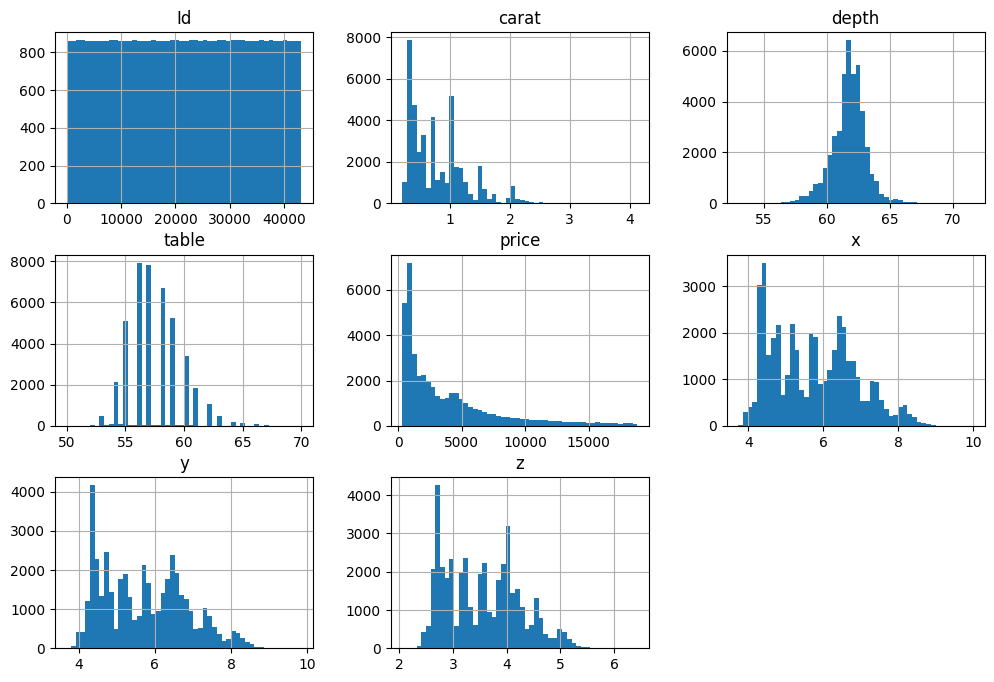

In [ ]:
train_data.hist(bins=50, figsize=(12, 8))

##Handling Dublicates Data

In [ ]:
train_data.duplicated().sum()

0

There are about 97 duplicate record , so we should drop them 

In [ ]:
train_data.drop_duplicates(keep = 'first', inplace = True)
train_data.duplicated().sum()

0

##Handling Skewed distribution Features

I will Try to use the Log function to transform the price and the carat columns into kinda Normally distrubuted Columns

<Axes: >

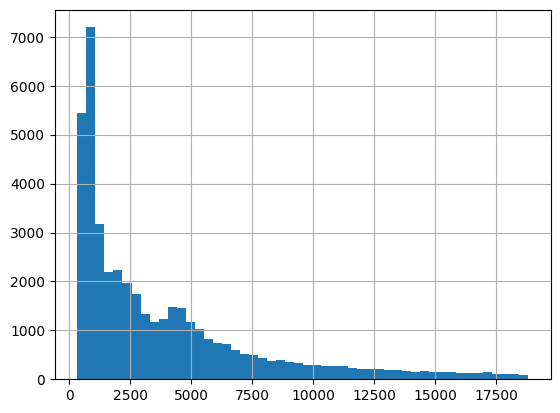

In [ ]:
train_data['price'].hist(bins=50)

In [ ]:
transformed = np.log(train_data['price'])

<Axes: >

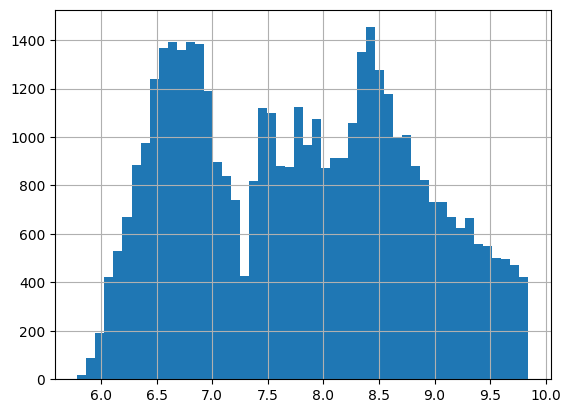

In [ ]:
transformed.hist(bins=50)

Notice how the distubution changed , but Now after make a prediction we should apply  an inverse function to return to the same price scale value 

<Axes: >

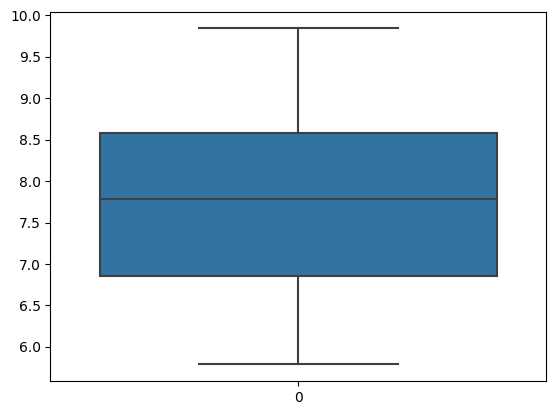

In [ ]:
sns.boxplot(data=transformed)

<Axes: >

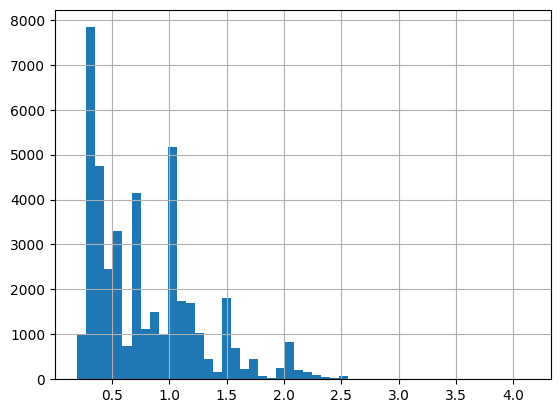

In [ ]:
train_data['carat'].hist(bins=50)

In [ ]:
train_data['carat'] = np.log(train_data['carat'])

<Axes: >

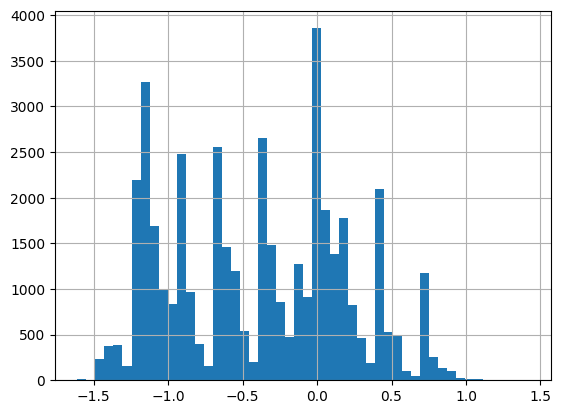

In [ ]:
train_data['carat'].hist(bins=50)

<Axes: xlabel='carat'>

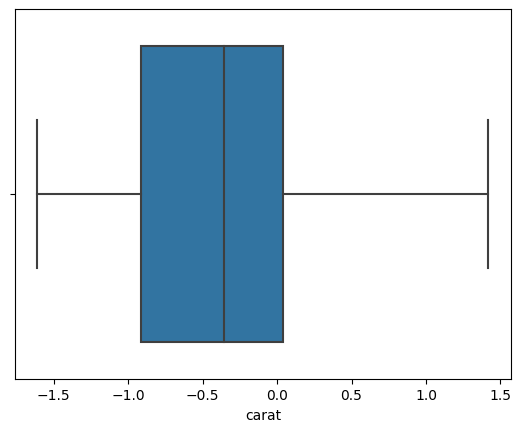

In [ ]:
sns.boxplot(data=train_data,x='carat')

<ipython-input-119-a42df55caaa0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = train_data.corr(),annot = True)


<Axes: >

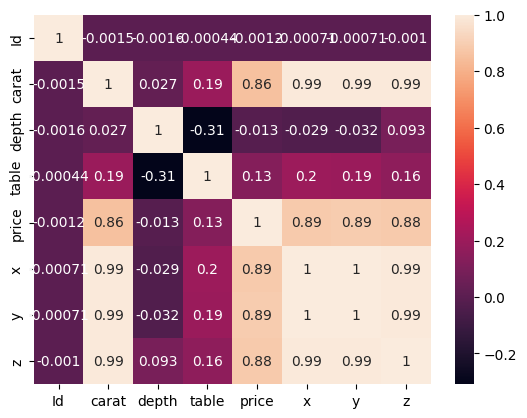

In [ ]:
sns.heatmap(data = train_data.corr(),annot = True)

Notice how the x , y , z features are higly linear corrleated with each other 
so that tells us and replace them with one feature the represent all of them 
and this feature I will call it Size , I tried to create a function by multiplying the squared value of each x,y,z to try to find any nonlinear corrleation  ((I TRIED THIS SQUARED METHOD AND IT DOESNT IMPROVE THE PREFORMANCE ))

Also I relized from the description of the depth that it is 2*z/(x+y)
so we can replace all the depth values with this equation to correct it ((I TRIED THIS AND IT DOESNT IMPROVE THE PREFORMANCE ))

Also table is numerical value represent a percentage , so we can rescale it by dividing it by 100 ((I TRIED THIS AND IT DOESNT IMPROVE THE PREFORMANCE ))

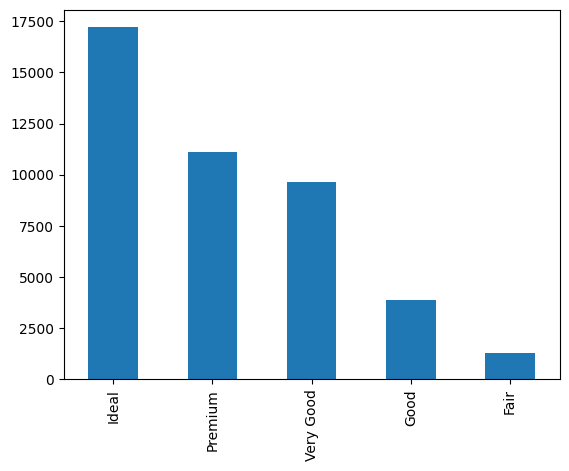

In [ ]:
train_data["cut"].value_counts().plot(kind="bar")
plt.show()

We Notice there that the fair & Good categories have very small amount of records  realtive to other categories , So we should fix this .

I will use Feature hasher to fix that 

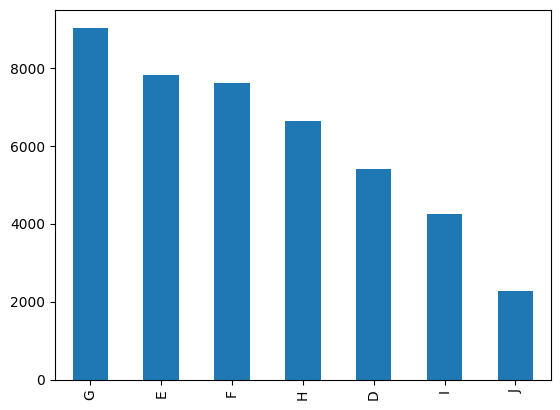

In [ ]:
train_data["color"].value_counts().plot(kind="bar")
plt.show()

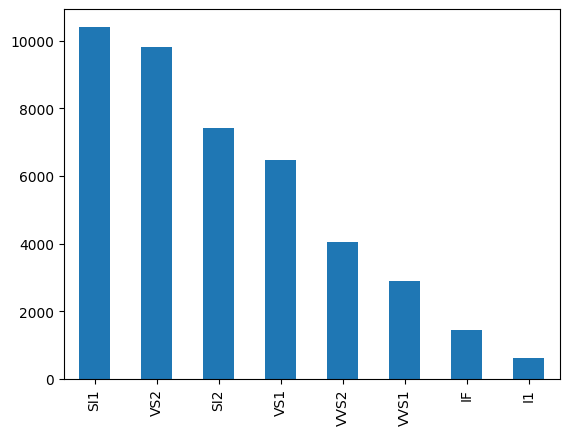

In [ ]:
train_data["clarity"].value_counts().plot(kind="bar")
plt.show()

We Notice there that the VVS2 , VVS1 ,IF & I1 categories have very small amount of records realtive to other categories , So we should fix this .

I will use Feature hasher to fix that

##Preprocessing Function 

In [ ]:
def apply_feature_hashing_manual(df):
  
    mask = (df['cut'] == 'Fair') | (df['cut'] == 'Good')
    df.loc[mask, 'cut'] = 'Other'

    df['clarity'] = df['clarity'].replace({'I1': 'SI2', 'VVS1': 'IF','VVS2': 'IF',})
    
  
    
    return df

In [ ]:
manual_hashed_trained_data = apply_feature_hashing_manual(train_data)
normal_trained_data = train_data.copy()

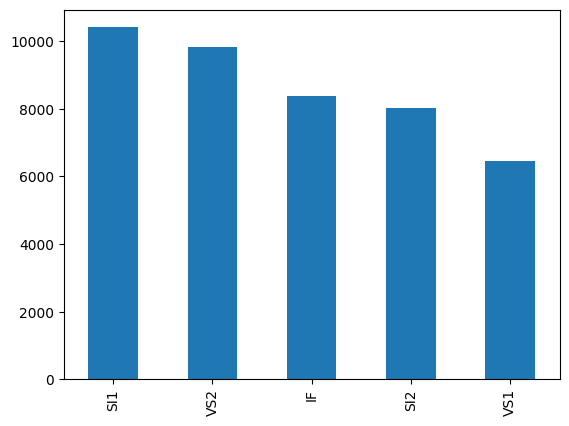

In [ ]:
manual_hashed_trained_data["clarity"].value_counts().plot(kind="bar")
plt.show()

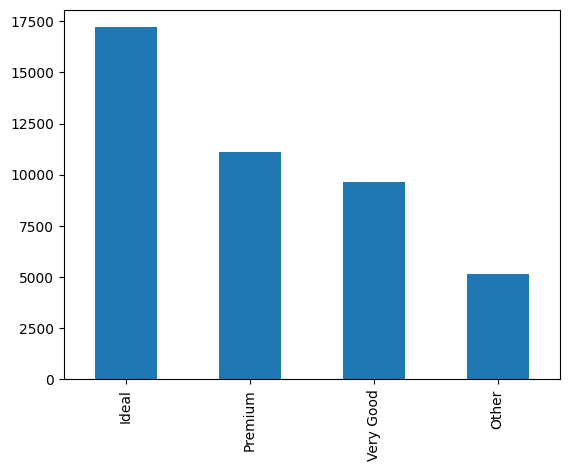

In [ ]:
manual_hashed_trained_data["cut"].value_counts().plot(kind="bar")
plt.show()

In [ ]:
from sklearn.feature_extraction import FeatureHasher
def apply_feature_hashing(df):
    
    cut_hasher = FeatureHasher(n_features=3)
    cut_hashed = cut_hasher.transform(df['cut'].apply(lambda x: str(x)).to_frame())
    cut_hashed_df = pd.DataFrame(cut_hashed.toarray())

    
    clarity_hasher = FeatureHasher(n_features=5, input_type='object')
    clarity_hashed = clarity_hasher.transform(df['clarity'].apply(lambda x: str(x)).to_frame())
    clarity_hashed_df = pd.DataFrame(clarity_hashed.toarray())

    
    hashed_df = pd.concat([df.drop(columns=['cut', 'clarity']), cut_hashed_df, clarity_hashed_df], axis=1)
    
    return hashed_df

In [ ]:
def preprocess(df):

  df['size'] = df['x'] * df['y'] * df['z']
  #df['depth'] = (2 * df['z'])/(df['x']+df['y'])
  #df['table'] = df['table']/100
  df.drop(['x','y','z','Id'],axis=1,inplace=True)

  return df 

##Handle Categorical Features

In [ ]:
cat_attribs = ['cut', 'color', 'clarity']
num_attribs = ['carat', 'depth', 'table','size']

###Manual Handling

In [ ]:
def handling_categorical_data_manual(df):
  color_code = {
        'D': 7,
        'E': 6,
        'F': 5,
        'G': 4,
        'H': 3,
        'I': 2,
        'J': 1
    }
  cut_code = {
    'Other':1,
    'Very Good':2,
    'Premium':3,
    'Ideal':4,
  }
  clarity_code = {
    'SI2':1,
    'SI1':2,
    'VS2':3,
    'VS1':4,
    'IF':5,
  } 

  df['color'] = df['color'].map(color_code)
  df['clarity'] = df['clarity'].map(clarity_code)
  df['cut'] = df['cut'].map(cut_code)
  
  return df

In [ ]:
preprocessor_Robust_Manual = ColumnTransformer(
  transformers=[
        ('num', RobustScaler(), num_attribs),
    ])

###One Hot Encoder

In [ ]:
preprocessor_Robust_OHE = ColumnTransformer(
  transformers=[
        ('num', RobustScaler(), num_attribs),
        ('cat', OneHotEncoder(), cat_attribs)
    ])
  

###Ordinal Encoder

In [ ]:
preprocessor_Robust_Ordinal = ColumnTransformer(
  transformers=[
        ('num', RobustScaler(), num_attribs),
        ('cat', OrdinalEncoder(), cat_attribs)
    ])
  

#Creating Piplines & Training the Models

In [ ]:
manual_hashed_trained_data = preprocess(manual_hashed_trained_data)
normal_trained_data = preprocess(normal_trained_data)

In [ ]:
manual_hashed_trained_data.head()

,carat,cut,color,clarity,depth,table,price,size
0,0.058269,Ideal,I,SI2,61.8,57.0,4270,176.483340
1,0.412110,Premium,G,IF,60.9,58.0,15164,246.965796
2,-1.139434,Ideal,F,VS2,61.3,56.0,828,52.943373
3,-0.634878,Ideal,G,VS2,61.2,56.0,1577,86.422842
4,-0.356675,Premium,H,IF,61.0,57.0,2596,115.315200


## ONE HOT Encoder Approach with Normal Trained Data

In [ ]:
X = normal_trained_data.drop(['price'],axis=1).copy()
y = normal_trained_data['price'].copy()

In [ ]:
X = preprocessor_Robust_OHE.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train = np.log(y_train)

###Linear Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

y_pred = lin_reg.predict(X_test)

y_pred = np.exp(y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 914.0719158087738


###SVM

In [ ]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)
y_pred = np.exp(y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 723.2381613147188


###Decision Tree 

In [ ]:
d_tree = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=5)
d_tree.fit(X_train,y_train)

y_pred = d_tree.predict(X_test)
y_pred = np.exp(y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 773.5914543614367


###Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=15, min_samples_leaf=15, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


y_pred = np.exp(y_pred)


rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 683.1804138681912


###XGBOOST

In [ ]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)


y_pred = np.exp(y_pred)


rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 683.7155169630051


## ONE HOT Encoder Approach with Manual Hashed Trained Data

In [ ]:
X = manual_hashed_trained_data.drop(['price'],axis=1).copy()
y = manual_hashed_trained_data['price'].copy()

In [ ]:
X = preprocessor_Robust_OHE.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train = np.log(y_train)

###Linear Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

y_pred = lin_reg.predict(X_test)

y_pred = np.exp(y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 914.0719158087738


###SVM

In [ ]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)
y_pred = np.exp(y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 723.2381613147188


###Decision Tree 

In [ ]:
d_tree = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=5)
d_tree.fit(X_train,y_train)

y_pred = d_tree.predict(X_test)
y_pred = np.exp(y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 773.5652328784595


###Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=15, min_samples_leaf=15, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


y_pred = np.exp(y_pred)


rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 683.1804138681912


###XGBOOST

In [ ]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)


y_pred = np.exp(y_pred)


rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 683.7155169630051


##Ordinal Encoder Approach with Normal Trained Data








In [ ]:
X = normal_trained_data.drop(['price'],axis=1).copy()
y = normal_trained_data['price'].copy()

In [ ]:
X = preprocessor_Robust_Ordinal.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train = np.log(y_train)

###XGBOOST

In [ ]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)


y_pred = np.exp(y_pred)


rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 673.061575554344


###Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=15, min_samples_leaf=15, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


y_pred = np.exp(y_pred)


rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 683.6648086643944


###Cat Regressor 

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostRegressor

In [ ]:

cat_reg = CatBoostRegressor()
cat_reg.fit(X_train,y_train)



Learning rate set to 0.071635
0:	learn: 0.9475895	total: 9.9ms	remaining: 9.89s
1:	learn: 0.8870202	total: 15.8ms	remaining: 7.89s
2:	learn: 0.8301381	total: 21.5ms	remaining: 7.16s
3:	learn: 0.7777004	total: 27.2ms	remaining: 6.78s
4:	learn: 0.7283833	total: 33.2ms	remaining: 6.6s
5:	learn: 0.6825317	total: 38.9ms	remaining: 6.45s
6:	learn: 0.6408894	total: 44.9ms	remaining: 6.37s
7:	learn: 0.6021880	total: 50.7ms	remaining: 6.28s
8:	learn: 0.5663791	total: 56.3ms	remaining: 6.2s
9:	learn: 0.5332935	total: 62.1ms	remaining: 6.15s
10:	learn: 0.5014663	total: 67.8ms	remaining: 6.09s
11:	learn: 0.4728491	total: 73.3ms	remaining: 6.04s
12:	learn: 0.4457583	total: 78.7ms	remaining: 5.97s
13:	learn: 0.4205484	total: 84.7ms	remaining: 5.96s
14:	learn: 0.3977816	total: 92.9ms	remaining: 6.1s
15:	learn: 0.3772129	total: 98.6ms	remaining: 6.06s
16:	learn: 0.3583157	total: 104ms	remaining: 6.03s
17:	learn: 0.3411254	total: 110ms	remaining: 6s
18:	learn: 0.3239207	total: 115ms	remaining: 5.96s
19

In [ ]:
y_pred = cat_reg.predict(X_test)
y_pred = np.exp(y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 651.894780098139


##Ordinal Encoder Approach with Manual Hashed Trained Data








In [ ]:
X = manual_hashed_trained_data.drop(['price'],axis=1).copy()
y = manual_hashed_trained_data['price'].copy()

In [ ]:
X = preprocessor_Robust_Ordinal.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train = np.log(y_train)

###XGBOOST

In [ ]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)


y_pred = np.exp(y_pred)


rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 673.061575554344


###Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=15, min_samples_leaf=15, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


y_pred = np.exp(y_pred)


rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 683.6648086643944


###Cat Regressor 

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
cat_reg = CatBoostRegressor()
cat_reg.fit(X_train,y_train)



Learning rate set to 0.071635
0:	learn: 0.9475895	total: 6.79ms	remaining: 6.79s
1:	learn: 0.8870202	total: 12.5ms	remaining: 6.24s
2:	learn: 0.8301381	total: 18.1ms	remaining: 6.02s
3:	learn: 0.7777004	total: 23.8ms	remaining: 5.94s
4:	learn: 0.7283833	total: 29.4ms	remaining: 5.85s
5:	learn: 0.6825317	total: 35.1ms	remaining: 5.82s
6:	learn: 0.6408894	total: 40.7ms	remaining: 5.78s
7:	learn: 0.6021880	total: 48.2ms	remaining: 5.97s
8:	learn: 0.5663791	total: 53.9ms	remaining: 5.93s
9:	learn: 0.5332935	total: 59.6ms	remaining: 5.9s
10:	learn: 0.5014663	total: 65.2ms	remaining: 5.86s
11:	learn: 0.4728491	total: 70.5ms	remaining: 5.81s
12:	learn: 0.4457583	total: 76ms	remaining: 5.77s
13:	learn: 0.4205484	total: 81.7ms	remaining: 5.75s
14:	learn: 0.3977816	total: 88.8ms	remaining: 5.83s
15:	learn: 0.3772129	total: 94.2ms	remaining: 5.79s
16:	learn: 0.3583157	total: 99.6ms	remaining: 5.76s
17:	learn: 0.3411254	total: 106ms	remaining: 5.78s
18:	learn: 0.3239207	total: 115ms	remaining: 5.9

In [ ]:
y_pred = cat_reg.predict(X_test)
y_pred = np.exp(y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 651.894780098139


#Trying GridSearch,Randomized Search & Cross Validation 

##Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
X = normal_trained_data.drop(['price'],axis=1).copy()
y = normal_trained_data['price'].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train = np.log(y_train)

In [ ]:
pipeline = Pipeline([
    ('preprocessor',preprocessor_Robust_Ordinal),
    ('regressor', CatBoostRegressor())
])

param_distributions = {
    'regressor__iterations': [100, 500, 1000],
    'regressor__depth': [5, 10, 15],
    'regressor__learning_rate': [0.01, 0.1, 1],
    'regressor__l2_leaf_reg': [1, 3, 5],
    'regressor__random_strength': [0.1, 1, 10]
}

random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)


print("Best hyperparameters:", random_search.best_params_)
print("Best mean squared error:", -random_search.best_score_)

In [ ]:
best_cat_reg_model = random_search.best_estimator_

y_pred = best_cat_reg_model.predict(X_test)

y_pred = np.exp(y_pred)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

the Randomized Search Took about 2hours training on gpu and the RMSE was 560

I should have try the feature hasher class but I RAN OUT OF TIME -_-





#Testing

In [ ]:
test1  = test_set.copy()
Id=test1['Id']
test1 = preprocess(test1)
test1 = preprocessor_Robust_OHE.transform(test1)


pred = xgb.predict(test1)
pred = np.exp(pred)
data={'Id': Id, 'price':pred }
sub = pd.DataFrame(data=data)
sub.to_csv('sub.csv',index=False)